<a href="https://colab.research.google.com/github/UCLM-ESI-NECULA/DataMining/blob/master/datasetCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nuova sezione

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!rm -rf sample_data/

In [ ]:
import numpy as np
import pandas as pd
import os
import re

DS1  = 'DS1-DatosConsumoAlimentario.txt'
DS2  = 'DS2-PreciosSemanales.txt'
DS3A = 'DS3A-DatosMercaMadrid.txt'
DS3B = 'DS3B-DatosMercaBarna.txt'
DS4  = 'DS4-ComercioExterior.txt'
DS5  = 'DS5-CoronavirusCases.txt'
DS6  = 'DS6-owid-covid-data.csv'


DS3Transformed = 'DS3-Transformed'

# Directory path
dir_path = '/content/drive/MyDrive/Scuola/UCLM/Colab Notebooks/Datasets/'

#DS1

In [ ]:
#Read dataset
df_1 = pd.read_csv(dir_path + DS1, sep='|',decimal=',')

# Remove the empty columns
print(df_1.isnull().sum()) #checking if I  have empty values there are 2 empty columns and 120 rows without penetration
df = df_1.drop(['Penetración (%)','Unnamed: 10', 'Unnamed: 11'], axis=1)


In this dataset, datas are not sorted and so we sorted it for data analyzing

In [ ]:
#enumarate the months
df_1['Mes'] = df_1['Mes'].map({'Enero':1, 'Febrero':2, 'Marzo':3,'Abril':4,'Mayo':5,'Junio':6,'Julio':7,'Agosto':8,'Septiembre':9,'Octubre':10,'Noviembre':11,'Diciembre':12})
df_1.sort_values(by=['Año','Mes','CCAA'])
print(df_1['CCAA'].value_counts())
print(df_1[df_1['Año']==2020]['CCAA'].value_counts())
#so after 2020 junio we have just the total national datas thats why some  months have higher frequency.last 120 rows are just total national

For creating the data card, some of the products name has to be changed (we will compare the products from DS1 and DS2 and add labels to DS1)

In [ ]:
df_1['Producto'] = df_1['Producto'].replace('MELON', 'MELONES')
df_1['Producto'] = df_1['Producto'].replace('CHAMPIÑONES+O.SETAS','CHAMPIÑONES')
df_1['Producto'] = df_1['Producto'].replace('FRESAS/FRESON', 'FRESONES')
df_1['Producto'] = df_1['Producto'].replace('LECHUGA/ESC./ENDIVIA', 'LECHUGAS')
df_1['Producto'] = df_1['Producto'].replace('MANGO', 'MANGOS')
df_1['Producto'] = df_1['Producto'].replace('PIÑA', 'PIÑAS')
df_1['Producto'] = df_1['Producto'].replace('PUERRO', 'PUERROS')
df_1['Producto'] = df_1['Producto'].replace('SANDIA', 'SANDIAS')
df_1['Producto'] = df_1['Producto'].replace('CHIRIMOYA', 'CHIRIMOYAS')

In this Dataset we have separate data for all CCAA of Spain, and 1 more category which is Total.Since we have already the total we can eliminate the others but firstly we need to check if the Total is sum/average of the other CCAAs.

In [ ]:
#this block of code helps us to compare the datas between other CCAAs and the total Nacionales
for x in range(2018,2021):
    for y in range(1,13):
        # Step 1: Sum Volumen and Valor excluding Total Nacional for the month 1, grouped by Producto
        sum_volumen_by_producto = df_1[(df_1['CCAA'] != 'Total Nacional') & (df_1['Mes'] == y) &(df_1['Año']==x)].groupby('Producto')['Volumen (miles de kg)'].sum()
        sum_valor_by_producto = df_1[(df_1['CCAA'] != 'Total Nacional') & (df_1['Mes'] == y)&(df_1['Año']==x)].groupby('Producto')['Valor (miles de €)'].sum()
        # Step 2: Calculate the average of Precio Medio excluding Total Nacional for the month 1, grouped by Producto
        avg_precio_medio_by_producto = df_1[(df['CCAA'] != 'Total Nacional') & (df_1['Mes'] == y)&(df_1['Año']==x)].groupby('Producto')['Precio medio kg'].mean()
        sum_volumen_by_producto = df_1[(df_1['CCAA'] != 'Total Nacional') & (df_1['Mes'] == y) &(df_1['Año']==x)].groupby('Producto')['Volumen (miles de kg)'].sum()
        # Step 3: Compare with Total Nacional values for the month 1, grouped by Producto
        total_nacional_values_by_producto = df_1[(df_1['CCAA'] == 'Total Nacional') & (df_1['Mes'] == y)&(df_1['Año']==x)].groupby('Producto').agg({
            'Volumen (miles de kg)': 'first',
            'Valor (miles de €)': 'first',
            'Precio medio kg': 'first'
        })
        print(f"Sum of Volumen of the year:{x}and the month:{y}(excluding Total Nacional) grouped by Producto:")
        print(sum_volumen_by_producto)
        print(f"\nSum of Valor of the year:{x}and the month:{y}(excluding Total Nacional) grouped by Producto:")
        print(sum_valor_by_producto)
        print(f"\nAverage Precio Medio of the year:{x}and the month:{y}(excluding Total Nacional) grouped by Producto:")
        print(avg_precio_medio_by_producto)
        # Compare with Total Nacional values grouped by Producto
        print(f"\nTotal Nacional values of the year:{x}and the month:{y} grouped by Producto:")
        print(total_nacional_values_by_producto)

So after checking we saw that Total Nacional datas are calculated correctly and since after 2020 june we just have the Total Nacional datas we can dropp the other CCAAs and save it

In [ ]:
df_total_nacional = df_1[df_1['CCAA'] == 'Total Nacional'].copy()
#Saving the cleaned dataset
df_total_nacional.to_csv(dir_path + 'Cleaned_' + DS1, sep='|', index=False)

#DS2

In [ ]:
import pandas as pd
import numpy as np

# Read the data from the TXT file into a DataFrame
df_2 = pd.read_csv(dir_path + DS2, sep='|',decimal=',')

#Getting a sample of the data
df_2 = df_2[['INICIO','FIN','SECTOR','SUBSECTOR','PRODUCTO','PRECIO']]

#Dropping all rows that contain 'nan'
df_2 = df_2.dropna(subset=['PRODUCTO'])

#Removing the useless information product
df_2['PRODUCTO'] = df_2['PRODUCTO'].str.replace(r'\(.*\)', '', regex=True)

df_2.head(500)


In [ ]:
#List of the products
unique_products = df_2['PRODUCTO'].unique()

print(unique_products)


In [ ]:
#Handling the dates
df_2['INICIO'] = pd.to_datetime(df_2['INICIO'], format='%d/%m/%Y')
df_2['FIN'] = pd.to_datetime(df_2['FIN'], format='%d/%m/%Y')
df_2['Year'] = df_2['INICIO'].dt.year
df_2['Month_INICIO'] = df_2['INICIO'].dt.month
df_2['Month_FIN'] = df_2['FIN'].dt.month

#Ordering the df product by product according to the unique products list
df_2['PRODUCTO'] = pd.Categorical(df_2['PRODUCTO'], categories=unique_products, ordered=True)
df_2 = df_2.sort_values('PRODUCTO')

#Reseting index after sorting
df_2.reset_index(drop=True, inplace=True)

#Redordering the dataframe
df_2 = df_2.reindex(columns=['Year','Month_INICIO','Month_FIN','SECTOR','SUBSECTOR','PRODUCTO','PRECIO'])
df_2 = df_2.sort_values(by=['Year','Month_INICIO','Month_FIN','PRODUCTO'])

df_2.head()

df_2.to_csv(dir_path + 'Cleaned_' + DS1, sep='|', index=False)

#DS3

For the third Dataset we had to do something different, we had to merge them.



*   First we removed the **Unidad** column, which had a constant value of 'KG'
*   Then we Unified the **Familia** column, because we didn't needed the specific family category

*   We unified the column **Familia** in order to have 2 big categories, Fruits, and Vegetables. We kept the 'Other' and 'Seta' categories, even if our statements are not regarding them.







In [ ]:
# Removing the column 'price_min' 'price_max' from dataset A
# Removing Unidad from both because is not needed, is only KG,

df1 = pd.read_csv(dir_path + DS3A, sep='|', usecols=['product', 'origen', 'familia', 'YEAR', 'MONTH', 'price_mean', 'Volumen'])
df2 = pd.read_csv(dir_path + DS3B, sep='|', usecols=['product', 'origen', 'familia', 'YEAR', 'MONTH', 'price_mean', 'Volumen'])


In [ ]:
# Function to correct misinterpreted UTF-8 encoded text
def normalize_text(text):
    if isinstance(text, str):
        try:
            return text.encode('iso-8859-1').decode('utf-8')
        except UnicodeDecodeError:
            # In case of decode error, return the original text
            return text
    return text

# Apply the function to all the data in both dataframes
df1 = df1.applymap(normalize_text)
df2 = df2.applymap(normalize_text)

In [ ]:
# Define a patterns
pattern_frutas = re.compile(r'^FRUTAS.*')
pattern_hortalizas = re.compile(r'^HORTALIZAS.*')

for df in [df1, df2]:
    # Replace 'ULTRAMARINO' with 'FRUTAS'
    df['familia'] = df['familia'].replace('ULTRAMARINO', 'FRUTAS')

    # Replace 'OTROS OTROS' with 'OTROS'
    df['familia'] = df['familia'].replace('OTROS OTROS', 'OTROS')

    # Replace 'OTROS SETA' with 'SETA'
    df['familia'] = df['familia'].replace('OTROS SETA', 'SETA')

    # Replace 'PATATAS' with 'HORTALIZAS'
    df['familia'] = df['familia'].replace('PATATAS', 'HORTALIZAS')

    # Replace 'FRUTAS ...' with 'FRUTAS'
    df['familia'] = df['familia'].replace(pattern_frutas, 'FRUTAS', regex=True)

    # Replace 'HORTALIZAS ...' with 'HORTALIZAS'
    df['familia'] = df['familia'].replace(pattern_hortalizas, 'HORTALIZAS', regex=True)

In [ ]:
# Replacing comma in numbers with dot for proper numeric conversion
df1['price_mean'] = df1['price_mean'].str.replace(',', '.').astype(float)
df2['price_mean'] = df2['price_mean'].str.replace(',', '.').astype(float)

# Merging the two datasets
merged_df = pd.concat([df1, df2])

# Grouping by common columns and calculating the mean of 'price_mean', and the 'sum' of the volume
grouped_df = merged_df.groupby(['product', 'origen', 'familia', 'YEAR', 'MONTH'], as_index=False) \
              .agg({'price_mean': 'mean', 'Volumen': 'sum'})

In [ ]:
# Define file paths for the output CSV files
output_file_path = os.path.join(dir_path,DS3Transformed,"DS3-ProductData")
output_file_path1 = os.path.join(dir_path,DS3Transformed,DS3A)
output_file_path2 = os.path.join(dir_path,DS3Transformed,DS3B)

# Save the DataFrames to CSV files
df1.to_csv(output_file_path1, sep='|', index=False)
df2.to_csv(output_file_path2, sep='|', index=False)
grouped_df.to_csv(output_file_path, sep='|', index=False)


In [ ]:
null_values_df = grouped_df.isnull().any()
print("Null values in dfa:\n", null_values_df)

<ipython-input-59-1ab27502bfa9>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use("seaborn")


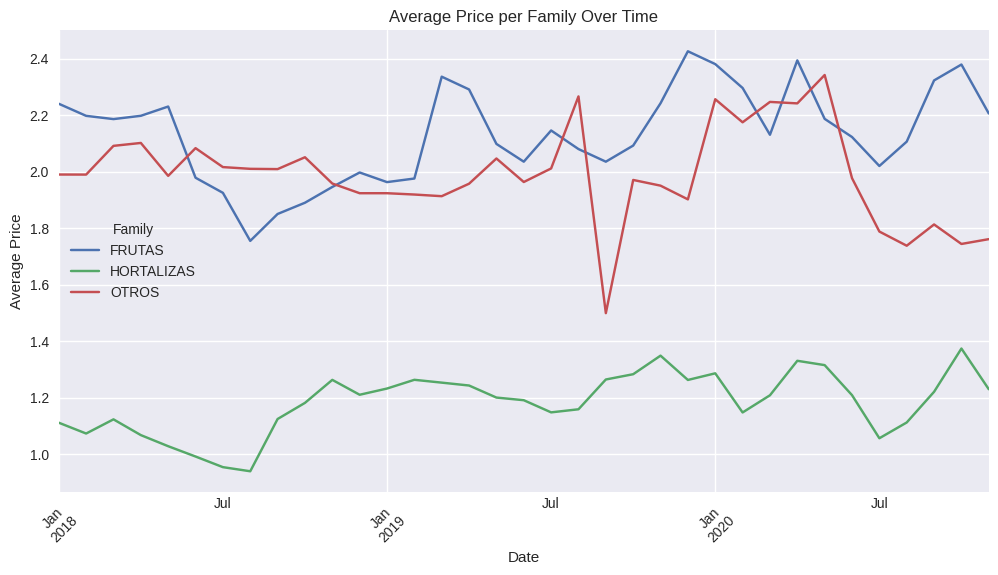

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

mpl.style.use("seaborn")

# Combine 'YEAR' and 'MONTH' into a single datetime column
grouped_df = grouped_df[grouped_df['familia'] != 'OTROS SETAS']

grouped_df['Date'] = pd.to_datetime(grouped_df['YEAR'].astype(str) + '-' + grouped_df['MONTH'].astype(str))

grouped_df.head()
# Calculating the mean price for each family over time
mean_price_per_family_time = grouped_df.groupby(['familia', 'Date'])['price_mean'].mean()

# Pivot the data for plotting
pivot_data = mean_price_per_family_time.reset_index().pivot(index='Date', columns='familia', values='price_mean')

# Plotting the mean price for each family over time
pivot_data.plot(kind='line', figsize=(12, 6))
plt.title("Average Price per Family Over Time")
plt.ylabel("Average Price")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.legend(title='Family')
plt.show()



#DS4

In [ ]:
#Reading the data from the TXT file into a DataFrame
df = pd.read_csv("/content/drive/MyDrive/mycolab/DS4-ComercioExterior.txt", sep='|')

# Remove duplicates
df = df.drop_duplicates()

#Handling missing values
df = df.dropna()

#Dropping the partner column
df.drop('PARTNER', axis=1, inplace=True)

#Replacing 'IMPORT' with 0 and 'EXPORT' with 1 in the "FLOW" column.
df['FLOW'] = df['FLOW'].map({'IMPORT': 0, 'EXPORT': 1})

#Identify rows where 'PERIOD' cannot be converted to datetime
invalid_rows = ~df['PERIOD'].str.match(r'^[a-zA-Z]{3}\.\s\d{4}$')

#Removing the invalid rows
df = df[~invalid_rows]

#Converting 'PERIOD' to datetime format
df['PERIOD'] = pd.to_datetime(df['PERIOD'], errors='coerce')

#Extracting Month and Year into separate columns and write months as numbers
df['MONTH'] = df['PERIOD'].dt.month
df['YEAR'] = df['PERIOD'].dt.year

#Filtering rows where 'Value' is not empty
df = df[df['Value'] != ':']

#Dropping the original 'PERIOD' column
df.drop('PERIOD', axis=1, inplace=True)

#Removing the useless information from reporter and product
df['REPORTER'] = df['REPORTER'].str.replace(r'\(.*\)', '', regex=True)
df['REPORTER'] = df['REPORTER'].str.split('-').str[0].str.strip()
df['PRODUCT'] = df['PRODUCT'].str.replace(r'\(.*\)', '', regex=True)
df['PRODUCT'] = df['PRODUCT'].str.split(',').str[0]

#Redordering the dataframe
df = df.reindex(columns=['YEAR','MONTH','REPORTER',	'PRODUCT',	'FLOW',	'INDICATORS',	'Value'])
df = df.sort_values(by=['YEAR','MONTH','PRODUCT'])
df.head()

#DS5

We processed both of the datasets we provided for coronavirus. We saw that the first one didn't have enough data for us so we'll only use the "owid-covid-data.csv".

In [ ]:
#Read dataset
df = pd.read_csv(dir_path+DS5, sep='|')
df.head()

#Create a new df for Spain
df_spain = df[df["countriesAndTerritories"]=='Spain']
df_spain.head()

# Summing up the cases of the same month
df_spain['dateRep'] = pd.to_datetime(df_spain['dateRep'], format='%d/%m/%Y')
df_spain['month'] = df_spain['dateRep'].dt.month
df_spain['year'] = df_spain['dateRep'].dt.year

cleaned_ds5 = df_spain.groupby(['year','month'])['cases'].sum().reset_index()

print(cleaned_ds5)

In [ ]:
#Reading the dataset (owid)
df = pd.read_csv(dir_path+DS6)

#Creating a new dataset for Spain
df_spain = df[df["location"]=='Spain']
df_spain.head()
df_spain = df_spain[['date','total_cases']]

#Replacing NaN values to 0
df_spain.fillna(0, inplace=True)

#Handling the dates
df_spain['date'] = pd.to_datetime(df_spain['date'], format='%Y/%m/%d')
df_spain['month'] = df_spain['date'].dt.month
df_spain['year'] = df_spain['date'].dt.year

#Accessing the last day of the month to reach the total_cases and putting them into a dataframe and ordering the dataframe
last_day_of_month = df_spain.groupby(['year', 'month'])['date'].max().reset_index()
last_day_cases = pd.merge(last_day_of_month, df_spain, on=['year', 'month', 'date'], how='left')[['year', 'month', 'total_cases']]
last_df= last_day_cases.groupby(['year', 'month'])['total_cases'].sum().reset_index()

last_df.head()